# Income Logistic Regression.

## Importing and cleansing data

### Import modules

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Visualisation Settings

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc("font", size=14)
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style('whitegrid')
sns.set_palette('BuGn')

### Logistic Regression Assumptions

In [3]:
#  Binary logistic regression requires the dependent variable to be binary.
#  For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
#  Only the meaningful variables should be included.
#  The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
#  The independent variables are linearly related to the log odds.
#  Logistic regression requires quite large sample sizes.

### Data

In [4]:
data = pd.read_excel("/Users/danielcorcoran/PycharmProjects/daniels_mac_proj/datasets/income_census.xlsx",
                  sheet_name = "Sheet1")

In [5]:
data.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [6]:
data.shape

(32561, 15)

In [7]:
for col in data.columns:
    print(col)
    print(data[col].nunique())
    print(data[col].value_counts())
    print("\n\n")

age
73
36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
60    312
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
80     22
79     22
81     20
82     12
84     10
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64



workclass
9
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64



fnlwgt
21648
164190     13
203488     13
123011     13
1

### Remove features

In [8]:
data = data.drop(
    [
        "fnlwgt"
    ],
    axis=1)

In [9]:
data.head(3)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,result
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [10]:
data.shape

(32561, 14)

In [11]:
for column in data.columns:
    unique_values = data[column].value_counts().count()
    print(column,"has",unique_values,"unique values.")

age has 73 unique values.
workclass has 9 unique values.
education has 16 unique values.
education_num has 16 unique values.
marital_status has 7 unique values.
occupation has 15 unique values.
relationship has 6 unique values.
race has 5 unique values.
sex has 2 unique values.
capital_gain has 119 unique values.
capital_loss has 92 unique values.
hours_per_week has 94 unique values.
native_country has 42 unique values.
result has 2 unique values.


### 'result' is the dependent variable, convert it to 0 and 1s 

In [12]:
data["result"] = data["result"].replace("win_A", 1)
data["result"] = data["result"].replace("win_B", 0)

In [13]:
data["result"].value_counts()

 <=50K    24720
 >50K      7841
Name: result, dtype: int64

## Meeting the assumptions of the model

### Meeting condition 1: No Nulls

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
result            32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [15]:
for column in data.columns:
    print(column,":","{:.2%}".format(1-(data[column].isnull().sum()/data.shape[0])))

age : 100.00%
workclass : 100.00%
education : 100.00%
education_num : 100.00%
marital_status : 100.00%
occupation : 100.00%
relationship : 100.00%
race : 100.00%
sex : 100.00%
capital_gain : 100.00%
capital_loss : 100.00%
hours_per_week : 100.00%
native_country : 100.00%
result : 100.00%


### Meeting condition 2: Sufficient Records

In [16]:
data.shape[0]/data.shape[1]

2325.785714285714

In [17]:
# condition is 50 records per variable

### Meeting condition 3: Target is binary or ordinal

In [18]:
dependent_variable = "result"
data[dependent_variable].value_counts()

 <=50K    24720
 >50K      7841
Name: result, dtype: int64

In [19]:
# there are only 2 values in the target varible, target is binary.

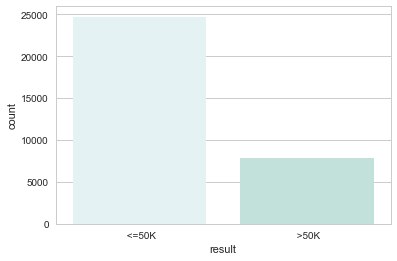

In [20]:
sns.countplot(data = data, x = dependent_variable)

### Meeting condition 4: Little to no multicollinearity

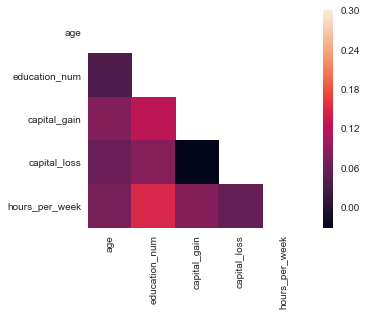

In [21]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(corr, mask = mask, vmax = 0.3, square = True)

## Data Manipulation

### Data Exploration

In [22]:
data.groupby(dependent_variable).mean()

,age,education_num,capital_gain,capital_loss,hours_per_week
result,,,,,
<=50K,36.783738,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,11.611657,4006.142456,195.001530,45.473026


### Convert continuous variables to discrete 

In [25]:
continuous_column_names = ["age", "education", "capital_gain", "capital_loss"]
number_bins = 4

for name in continuous_column_names:
    data = pd.concat(
        [
            data,
            pd.cut(data[name], bins=number_bins, right=True).rename("binned_" + name)
        ],
        axis=1)

data.drop(continuous_column_names, axis=1, inplace=True)

TypeError: must be str, not float

### Creating Dummy Variables

In [ ]:
#converting categorical columns into binary columns

cat_vars = ["stance_A", "stance_B"]

for var in cat_vars:
    cat_list = 'var' + "_" + var
    cat_list = pd.get_dummies(data[var], prefix=var, drop_first=True)
    data1 = data.join(cat_list)
    data = data1

data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [ ]:
data_final = data[to_keep]
data_final.columns.values

In [ ]:
data_final.shape

In [ ]:
data_final.head(3)

### Export subset of data after creating dummy variables, to test model on later

In [ ]:
boxing_last_x_records = data_final[2228:2728]

In [ ]:
boxing_last_x_records.shape

In [ ]:
#export test data for later, this data has not been touched by the regression

boxing_last_x_records.to_csv("boxing_last_x_records.csv")

In [ ]:
data_final.shape

In [ ]:
data_final = data_final[0:2228]

In [ ]:
data_final.shape

## Creating the Model

### Feature Selection (RFE) 

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=[dependent_variable]
X=[i for i in data_final_vars if i not in y]

In [ ]:
#using recursive feature elimination to remove irrelevant columns

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

features_to_keep = 12

rfe = RFE(logreg, features_to_keep) 
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
rfe_support_list = rfe.support_.tolist()
print(rfe_support_list)

### Collecting relevant columns

In [ ]:
data_final_columns = data_final[X].columns.tolist()

for n in range(len(rfe_support_list)):

    print(str(rfe_support_list[n]) + " : " + data_final_columns[n])

In [ ]:
relevant_columns = []
for n in range(len(rfe_support_list)):
    if rfe_support_list[n] == True:
        relevant_columns.append(data_final_columns[n])
relevant_columns

In [ ]:
X = data_final[relevant_columns]
y = data_final[dependent_variable]

### Logistic Regression Model Fitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#### Show coefficients

In [ ]:
for n in logreg.coef_.tolist():
    print(n)

#### Show intercept

In [ ]:
logreg.intercept_

#### Show independant variables

In [ ]:
X.columns

In [ ]:
len(X.columns)

### Predicting test set results and calculating the accuracy

In [ ]:
y_pred = logreg.predict(X_test)
print("Accuracy of logistic regression classifier on test set: {:.2%}".format(logreg.score(X_test, y_test)))

## Validating the Model

### Cross Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: {:.2%}".format(results.mean()))

If the accuracy remains close to the accuracy of the logistic regression classifier on test set above the model 'generalizes well'

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_ = confusion_matrix(y_test, y_pred)
print(confusion_matrix_)

In [ ]:
# 6105 + 25 correct predictions
# 288 + 18 incorrect predictions 

### Compute precision, recall, F-measure and support

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

### ROC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
